In [1]:
from random import random
from math import exp
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
def jukes_kantor(sequence, alpha, delta_t, n_steps):
    
    seq = sequence
    mutant_seq = ""
    amino_acids_A = ["C", "T", "G"]
    amino_acids_C = ["A", "T", "G"]
    amino_acids_T = ["A", "C", "G"]
    amino_acids_G = ["A", "C", "T"]
    
    distance = []
    
    stationary_distribution = {"A" : 0.25,
                              "C" : 0.25,
                              "G" : 0.25,
                              "T" : 0.25,
                              }
    
    limit_0 = 0
    limit_1 = (1/4 + 3/4 * exp(-4 * alpha * delta_t))
    
    limit_2 = (1/4 + 3/4 * exp(-4 * alpha * delta_t)) + \
    1*(1/4 - 1/4 * exp(-4 * alpha * delta_t))
    
    limit_3 = (1/4 + 3/4 * exp(-4 * alpha * delta_t)) + \
    2*(1/4 - 1/4 * exp(-4 * alpha * delta_t))
    
    limit_4 = (1/4 + 3/4 * exp(-4 * alpha * delta_t)) + \
    3*(1/4 - 1/4 * exp(-4 * alpha * delta_t))
            
    for step in range(0,n_steps):
        #print(seq)
        #print("########")
        for s in seq:
            random_number = random()
            if s == "A":
                amino_acids = amino_acids_A
            elif s == "C":
                amino_acids = amino_acids_C
            elif s == "T":
                amino_acids = amino_acids_T
            elif s == "G":
                amino_acids = amino_acids_G
            if random_number > limit_0 and random_number <= limit_1:
                mutant_seq += s
            elif random_number > limit_1 and random_number <= limit_2:
                mutant_seq += amino_acids[0]
            elif random_number > limit_2 and random_number <= limit_3:
                mutant_seq += amino_acids[1]
            elif random_number > limit_3 and random_number <= limit_4:
                mutant_seq += amino_acids[2]
        
        sequence_frequence = Counter(seq)
        sequences_distance = 0
        
        for key in stationary_distribution:
            sequences_distance += ((stationary_distribution[key] - \
                                    sequence_frequence[key]/len(seq))**2)
            
        distance.append((sequences_distance)**0.5)
        seq = mutant_seq
        mutant_seq = ""
            
    return(seq, distance)
            

In [3]:
#sequence = "ATGTTACTAAAGTGTGTTTGCAGAGCCGGCATAATATCTATCAAAGGAATCTTTCCTCGATGGTACTCCAATTCTCAAAAAGTGGCCAATTTGGGGCAAATAACAGATTATTTAGTGGTTAAAGGTGTTCCCAATTTGTTACAAAAAATGTTCAAGGAGTCAGTGTTGGCGGATAACGTTGTTTTTAGACTATTTCCAACATCGCATCCATATATTCCAGTGTTACATGGAAAATCAAAATACATGGCTTCTTTGAATGCAATGCGAATGATAGTACGAAAGTTTATCTTGGGCGATGAATGTCGCTTGCATATAAGTTCAGTAAAGACTCTAACATCGACATCGCATGATGAAGAAGTTAAATCTGCTCTT"
sequence = "AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA\
AAAAAAAAAAAAA"
a = 0.02
d = 0.001
n = 150000

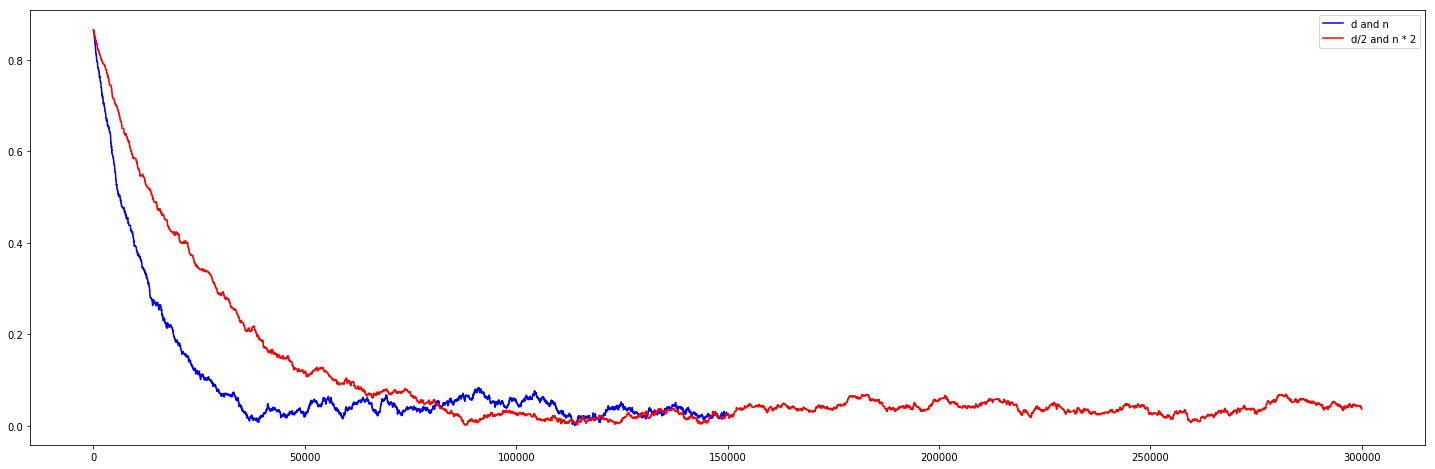

In [4]:
plt.figure(figsize=(25,8))

#1
new_seq, dist = jukes_kantor(sequence,a,d,n)
plt.plot(dist, label = "d and n", color = 'b')
#plt.legend(loc = 'upper right')

#2
new_seq, dist = jukes_kantor(sequence,a,d/2,n*2)
plt.plot(dist, label = "d/2 and n * 2", color = 'r')
plt.legend(loc = 'upper right')

plt.show()

plt.close()

In [ ]:
# Tak jak widac na wykresie powyzej, funkcja w ktorej kwant czasu jest dwa razy 
# mniejszy (czerwona linia) potrzebuje o wiele więcej czasu aby zbiec do 
# tych samych wartosci, do ktorych wczesniej zbiegla funkcja gdzie kwant 
# czasu jest wiekszy (niebieska linia).
# Zaobserwowane zjawisko wynika z własciwosci lancuchów Markowa, 
# ze po odpowiednio dlugim okresie czasu proces modelowany 
# stochastycznie zdaza do rozkladu stacjonarnego.